# Importing Necessary Libraries

In [659]:
# Necessary imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
from IPython.display import display, HTML


# Load and Prepare the Dataset

In [661]:
# Load training and test datasets
train_data = pd.read_csv('train.csv', sep=',', index_col=0)
test_data = pd.read_csv('test_attribute.csv', sep=',', index_col=0)

# Display the data to ensure it loaded correctly
print("Training Data (First 5 Rows):\n", tabulate(train_data.head(), headers='keys', tablefmt='grid'))
print("\nTest Data (First 5 Rows):\n", tabulate(test_data.head(), headers='keys', tablefmt='grid'))


Training Data (First 5 Rows):
 +----+------+------+------+------+-----+-----+------+------+-----+
|    |    0 |    1 |    2 |    3 |   4 |   5 |    6 |    7 |   8 |
+====+======+======+======+======+=====+=====+======+======+=====+
|  0 | 0.81 | 0.85 | 0.47 | 0.37 | 0.5 |   0 | 0.56 | 0.22 |   1 |
+----+------+------+------+------+-----+-----+------+------+-----+
|  1 | 0.7  | 0.58 | 0.53 | 0.39 | 0.5 |   0 | 0.59 | 0.22 |   1 |
+----+------+------+------+------+-----+-----+------+------+-----+
|  2 | 0.72 | 0.73 | 0.41 | 0.28 | 0.5 |   0 | 0.44 | 0.22 |   1 |
+----+------+------+------+------+-----+-----+------+------+-----+
|  3 | 0.78 | 0.69 | 0.44 | 0.26 | 0.5 |   0 | 0.54 | 0.22 |   1 |
+----+------+------+------+------+-----+-----+------+------+-----+
|  4 | 0.74 | 0.82 | 0.46 | 0.24 | 0.5 |   0 | 0.48 | 0.22 |   1 |
+----+------+------+------+------+-----+-----+------+------+-----+

Test Data (First 5 Rows):
 +----+------+------+------+------+-----+------+------+------+
|    |  

## Visualization of Target Class Distribution

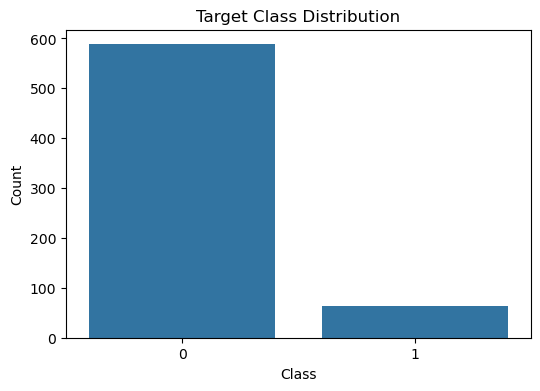

In [663]:
# Visualize distribution of target classes
plt.figure(figsize=(6, 4))
sns.countplot(x=train_data.iloc[:, -1])
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


## Split data into training and validation sets

In [665]:
# Split data into training and validation sets for model evaluation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Define hyperparameters for Grid Search

In [667]:
# Define hyperparameters for Grid Search on the RandomForest and SVM Classifiers
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

## Grid Search on the RandomForest and SVM Classifiers and its best parameters

In [669]:
# Perform Grid Search for RandomForest and SVM Classifiers
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, scoring='f1', cv=5)
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_

svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, scoring='f1', cv=5)
svm_grid_search.fit(X_train, y_train)
best_svm = svm_grid_search.best_estimator_

# Display best parameters for both classifiers
print("\nBest Parameters for SVM:", svm_grid_search.best_params_)
print("Best Parameters for RandomForest:", rf_grid_search.best_params_)


Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Parameters for RandomForest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


## Evaluating F1 scores

In [671]:
# Evaluate F1 scores on the validation set for both classifiers
svm_val_predictions = best_svm.predict(X_val)
rf_val_predictions = best_rf.predict(X_val)

svm_f1 = f1_score(y_val, svm_val_predictions, average="weighted")
rf_f1 = f1_score(y_val, rf_val_predictions, average="weighted")

# Displaying F1 scores in a table format
results_table = [["Model", "Validation F1 Score"],
                 ["SVM", round(svm_f1, 2)],
                 ["RandomForest", round(rf_f1, 2)]]
print("\nModel Comparison:\n", tabulate(results_table, headers="firstrow", tablefmt="grid"))


Model Comparison:
 +--------------+-----------------------+
| Model        |   Validation F1 Score |
+==============+=======================+
| SVM          |                  0.98 |
+--------------+-----------------------+
| RandomForest |                  0.97 |
+--------------+-----------------------+


## Calculating accuracy and F1 score

In [673]:

# Calculating accuracy and F1 score for training set
train_predictions = best_svm.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions, average="weighted")

# Displaying training set accuracy
train_results = [["Metric", "Value"],
                 ["Training Set Accuracy", round(train_accuracy, 2)],
                 ["Training Set F1 Score", round(train_f1, 2)],
                 ]
# Displaying F1 score
train_F1_results = [["Metric", "Value"],
                 ["Validation F1 Score", round(svm_f1, 2)]]

print("\nTraining and Validation Results:\n", tabulate(train_results, headers="firstrow", tablefmt="grid"))

print("\nF1 Score Result:\n",tabulate(train_F1_results, headers="firstrow", tablefmt="grid"))

# Check which model has a better F1 score
if svm_f1 > rf_f1:
    better_model = "SVM classifier"
else:
    better_model = "RandomForest classifier"

comparison_result = [["Model Comparison", better_model]]
print("\nComparison Result:\n", tabulate(comparison_result, headers="firstrow", tablefmt="grid"))


Training and Validation Results:
 +-----------------------+---------+
| Metric                |   Value |
+=======================+=========+
| Training Set Accuracy |    0.98 |
+-----------------------+---------+
| Training Set F1 Score |    0.97 |
+-----------------------+---------+

F1 Score Result:
 +---------------------+---------+
| Metric              |   Value |
+=====================+=========+
| Validation F1 Score |    0.98 |
+---------------------+---------+

Comparison Result:
 +--------------------+------------------+
| Model Comparison   | SVM classifier   |
+====================+==================+
+--------------------+------------------+


## Confusion matrix for SVM

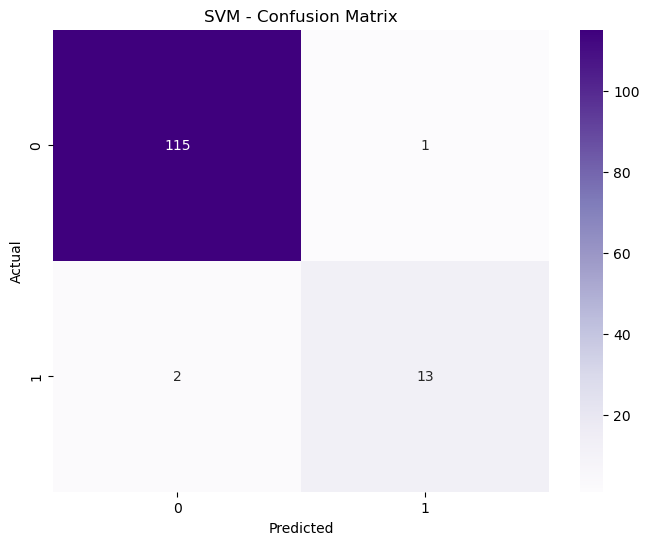

In [676]:
# Plot the confusion matrix for SVM
svm_conf_matrix = confusion_matrix(y_val, svm_val_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



##

## Plot distribution of incorrect predictions vs actual predictions

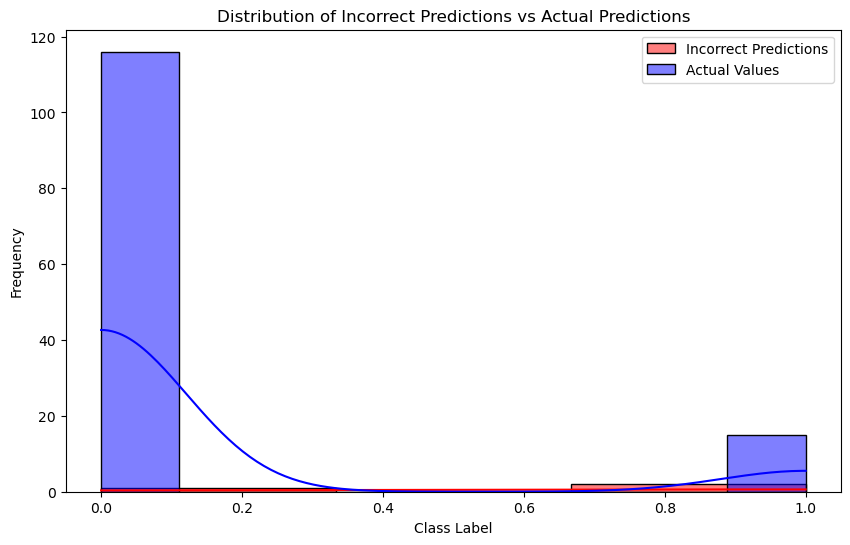

In [679]:
# Plot distribution of incorrect predictions vs actual predictions
incorrect_predictions = y_val != svm_val_predictions
plt.figure(figsize=(10, 6))
sns.histplot(y_val[incorrect_predictions], color="red", label="Incorrect Predictions", kde=True)
sns.histplot(y_val, color="blue", label="Actual Values", kde=True, alpha=0.5)
plt.title("Distribution of Incorrect Predictions vs Actual Predictions")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.legend()
plt.show()



## Save Predictions to a Text File

In [682]:
# Predictions on test dataset and saving it to prediction.txt file
test_predictions = best_svm.predict(test_data_scaled)
np.savetxt("prediction.txt", test_predictions, fmt='%d')
print("\nPredictions saved to 'prediction.txt'")


Predictions saved to 'prediction.txt'


### Briefly describe your approach in the following cell.

In [685]:
display(HTML("<h4>To start, I loaded both the training and testing datasets from CSV files and initiated the model development process. I examined the data distribution and structure through visualizations to gain initial insights.</h4>"))
display(HTML("<h4>Next, I evaluated two powerful algorithms - Support Vector Machine (SVM) and Random Forest Classifier - by comparing their F1 scores. I used GridSearchCV to find the best parameters for both models, ensuring optimal performance.</h4>"))
display(HTML("<h4>I then split the data into training (80%) and validation (20%) sets, and performed feature scaling for better model performance. I created visualization tools like confusion matrices and distribution plots to understand model behavior and identify any patterns in incorrect predictions.</h4>"))
display(HTML("<h4>Finally, I selected the better performing model based on F1 scores, made predictions on the test dataset, and saved the results to 'prediction.txt'. Thank you for reviewing my approach!</h4>"))